#Read dataset

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import pandas as pd
# silahkan di ganti path nya
df = pd.read_csv('/content/drive/MyDrive/Data Science Digital Skola/session 38/bank.csv', delimiter=',')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### check missing value

In [39]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

### cek categorical attributes

In [40]:
df_X = df.drop(['deposit'],axis=1)
df_y = df[['deposit']]
cats = df_X.select_dtypes(include=['object', 'bool']).columns
cats

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

### check unique values from each categorical attributes

In [41]:
print(df.job.unique())
print(df.marital.unique())
print(df.education.unique())
print(df.default.unique())
print(df.housing.unique())
print(df.loan.unique())
print(df.contact.unique())
print(df.month.unique())
print(df.poutcome.unique())

['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
['married' 'single' 'divorced']
['secondary' 'tertiary' 'primary' 'unknown']
['no' 'yes']
['yes' 'no']
['no' 'yes']
['unknown' 'cellular' 'telephone']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
['unknown' 'other' 'failure' 'success']


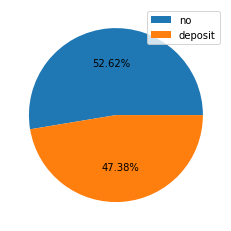

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df_X = df.drop(['deposit'],axis=1)
df_y = df[['deposit']]

nums = df_X.select_dtypes(include=['int64', 'float64']).columns
cats = df_X.select_dtypes(include=['object', 'bool']).columns

le = LabelEncoder()
for i in cats:
  df_X[i] = le.fit_transform(df_X[i])


df_y = le.fit_transform(df_y['deposit'])

X = df_X.astype(float).values
y = df_y.astype(float)
plt.pie(pd.DataFrame(y).value_counts(), autopct='%1.2f%%')
plt.legend(['no', 'deposit'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


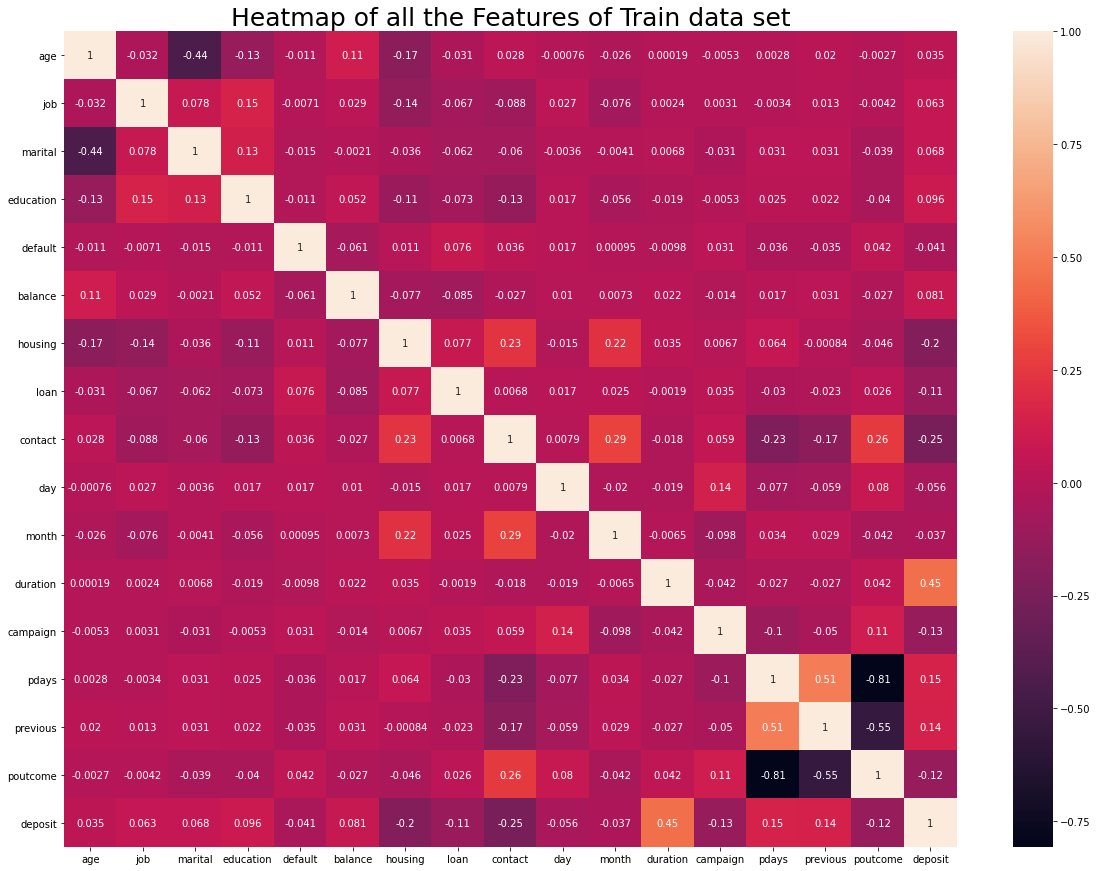

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

df_y = df[['deposit']]
le = LabelEncoder()
df_y['deposit'] = le.fit_transform(df_y['deposit'])

data = pd.concat([df_X, df_y], axis=1)
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot=True)
plt.title("Heatmap of all the Features of Train data set", fontsize = 25);
plt.show()

In [45]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

# Using Pipeline for imputation, encoding, feature selection and classifier

Accuracy  0.7721707972529113
Precision  0.7719065204781212
Recall  0.7722701770454605
Confusion matrix  [[1341  401]
 [ 362 1245]]


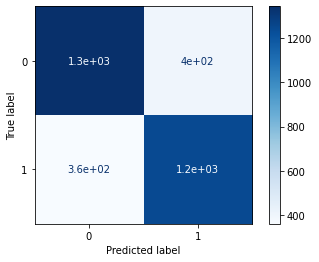

In [46]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

df_X = df.drop(['deposit'],axis=1)
df_y = df[['deposit']]

le = LabelEncoder()
df_y= le.fit_transform(df_y['deposit'])

nums = df_X.select_dtypes(include=['int64', 'float64']).columns
cats = df_X.select_dtypes(include=['object', 'bool']).columns

X_train, X_test, y_train, y_test = train_test_split(
    df_X, df_y, test_size=0.3, random_state=42)

numerical_transformer = SimpleImputer(strategy='median')
categorical_transformer = Pipeline(steps=[
('imputer', SimpleImputer(strategy='most_frequent')),
('imput', OneHotEncoder())
])

preprocessor = ColumnTransformer(
transformers=[
('num', numerical_transformer, nums),
('cat', categorical_transformer, cats)
])

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('scaling', StandardScaler()), 
                           ('feature_selection', SelectFromModel(ExtraTreesClassifier(random_state=2), prefit=False)),
                           ('classifier', DecisionTreeClassifier(random_state=42, max_depth=10))])

pipeline = pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print('Accuracy ',metrics.accuracy_score(y_test, y_pred))    
print('Precision ',metrics.precision_score(y_test, y_pred, average='macro'))  
print('Recall ',metrics.recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', metrics.confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(pipeline, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()


## Make prediction for new data

In [47]:
data = [{'age':68, 'job':'admin.', 'marital':'married', 'education':'secondary', 
         'default':'no', 'balance':2000, 'housing':'yes',
         'loan':'no', 'contact':'unknown', 'day':5, 'month':'may', 'duration':1000, 
         'campaign':1, 'pdays':-1,'previous':0, 'poutcome':'unknown'},
        {'age':18, 'job':'unknown', 'marital':'single', 'education':'secondary', 
         'default':'no', 'balance':200, 'housing':'no',
         'loan':'no', 'contact':'unknown', 'day':5, 'month':'may', 'duration':10, 
         'campaign':0, 'pdays':-1,'previous':0, 'poutcome':'unknown'}]

df_input = pd.DataFrame(data)
result = pipeline.predict(df_input)

for i in result:
  int_result = int(i)
  if (int_result == 0):
    decision = 'No'
  elif (int_result==1):
    decision = 'Yes'
  else:
    decison = 'Not defined'
  print('Possible to deposit is ', decision)

Possible to deposit is  Yes
Possible to deposit is  No


In [48]:
df_input

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,68,admin.,married,secondary,no,2000,yes,no,unknown,5,may,1000,1,-1,0,unknown
1,18,unknown,single,secondary,no,200,no,no,unknown,5,may,10,0,-1,0,unknown


# Save the model

In [49]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import joblib

df_X = df.drop(['deposit'],axis=1)
df_y = df[['deposit']]

le = LabelEncoder()
df_y = le.fit_transform(df_y['deposit'])

nums = df_X.select_dtypes(include=['int64', 'float64']).columns
cats = df_X.select_dtypes(include=['object', 'bool']).columns

X_train, X_test, y_train, y_test = train_test_split(
    df_X, df_y, test_size=0.3, random_state=42)

numerical_transformer = SimpleImputer(strategy='median')
categorical_transformer = Pipeline(steps=[
('imputer', SimpleImputer(strategy='most_frequent')),
('imput', OneHotEncoder())
])

preprocessor = ColumnTransformer(
transformers=[
('num', numerical_transformer, nums),
('cat', categorical_transformer, cats)
])

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('scaling', StandardScaler()), 
                           ('feature_selection', SelectFromModel(ExtraTreesClassifier(random_state=2), prefit=False)),
                           ('classifier', DecisionTreeClassifier(random_state=42, max_depth=10))])

pipeline = pipeline.fit(X_train, y_train)
#y_pred = pipeline.predict(X_test)

pipeline = pipeline.fit(X_train, y_train)
filename = '/content/drive/MyDrive/Data Science Digital Skola/session 38/trained_model.pkl'
joblib.dump(pipeline, filename)

['/content/drive/MyDrive/Data Science Digital Skola/session 38/trained_model.pkl']

# Load the model and make prediction

In [50]:
import joblib
import pandas as pd

filename = '/content/drive/MyDrive/Data Science Digital Skola/session 38/trained_model.pkl'
loaded_model = joblib.load(filename)

data = {'age':68, 'job':'admin.', 'marital':'married', 'education':'secondary', 
        'default':'no', 'balance':2000, 'housing':'yes','loan':'no', 'contact':'unknown', 
        'day':5, 'month':'may', 'duration':1000, 'campaign':1, 'pdays':-1,
        'previous':0, 'poutcome':'unknown'}
df_input = pd.DataFrame(data, index=[0])
result = loaded_model.predict(df_input)

for i in result:
  int_result = int(i)
  if (int_result == 0):
    decision = 'No'
  elif (int_result==1):
    decision = 'Yes'
  else:
    decison = 'Not defined'

print('Possible to deposit is ', decision)

Possible to deposit is  Yes


# Introduction to Flask

## silahkan check file python yang sudah saya share